# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


state is a categorical data so we changeit into binary with dummy

In [4]:
data =pd.get_dummies(data,columns = ['State'])
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [5]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

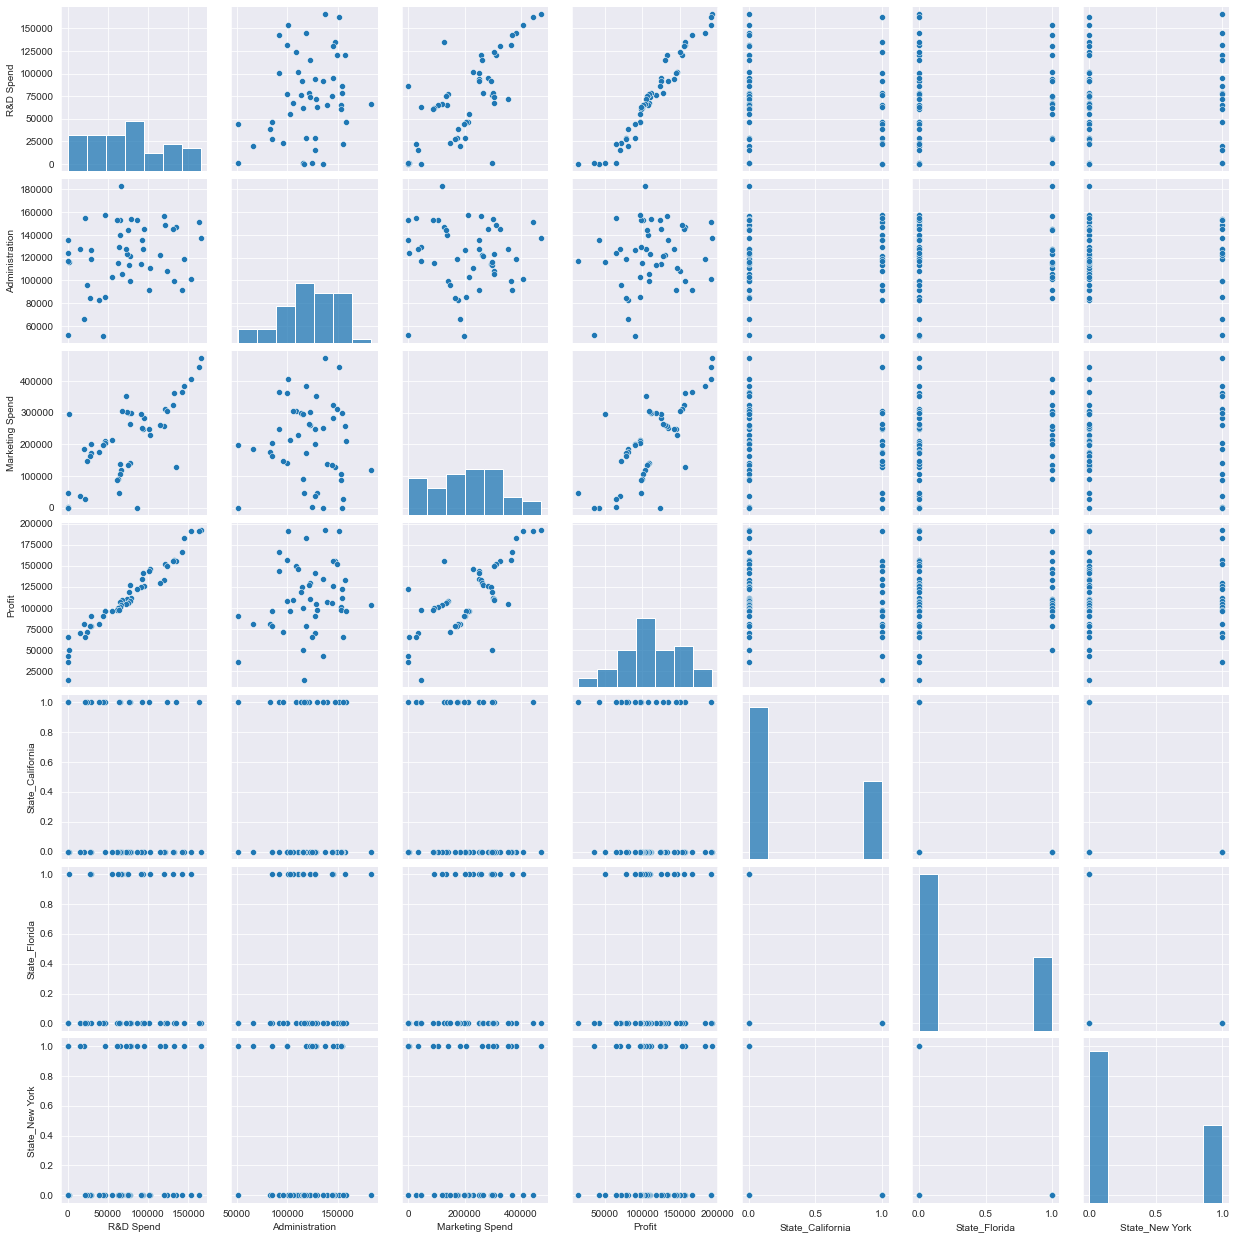

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [7]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS','State_California':'SC', 'State_Florida':'SF', 'State_New York':'SNY'},axis=1)
data1

,RDS,ADMS,MKTS,Profit,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [8]:
model=smf.ols("Profit~RDS+ADMS+MKTS+SC+SF+SNY",data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.34e-27
Time:                        21:59:29   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RDS            0.8060      0.046     17.369      0.000       0.712       0.900
ADMS          -0.0270      0.052     -0.517      0.608      -0.132       0.078
MKTS           0.0270      0.017      1.574      0.123      -0.008       0.062
SC          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
SF          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
SNY         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
model1=smf.ols("Profit~RDS+MKTS+SC+SF+SNY",data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           9.72e-29
Time:                        22:00:10   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
RDS            0.7967      0.042     18.771      0.000       0.711       0.882
MKTS           0.0298      0.016      1.842      0.072      -0.003       0.062
SC          1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
SF          1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
SNY         1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     2.14e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.18e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

probability of t value on less than 0.5 so we also need to see Rqured value  and adj Rsqured vale the distance between then should be minimum and also AIC value from previous summary and after removing 

In [10]:
model2=smf.ols("Profit~RDS+SC+SF+SNY",data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.76e-29
Time:                        22:00:33   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
RDS            0.8530      0.030     28.226      0.000       0.792       0.914
SC          1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
SF          1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
SNY          1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     2.41e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.45e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
model=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           2.50e-10
Time:                        09:22:08   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADMS           0.3237      0.131      2.468      0.017       0.060       0.588
MKTS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# vif value 

In [11]:
rsq_rnd = smf.ols("RDS~ADMS+MKTS", data= data1).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)

rsq_adm = smf.ols("ADMS~RDS+MKTS", data=data1).fit().rsquared
ViF_adm = 1/(1-rsq_adm) 

rsq_mar = smf.ols("MKTS~RDS+ADMS", data= data1).fit().rsquared
ViF_mar = 1/(1-rsq_mar) 

d1 ={'variable':["MKTS","RDS","ADMS"],'VIF':[ViF_rnd ,ViF_adm,ViF_mar]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,variable,VIF
0,MKTS,2.468903
1,RDS,1.175091
2,ADMS,2.326773


mkts is highlu infuntial value so we can remove that column

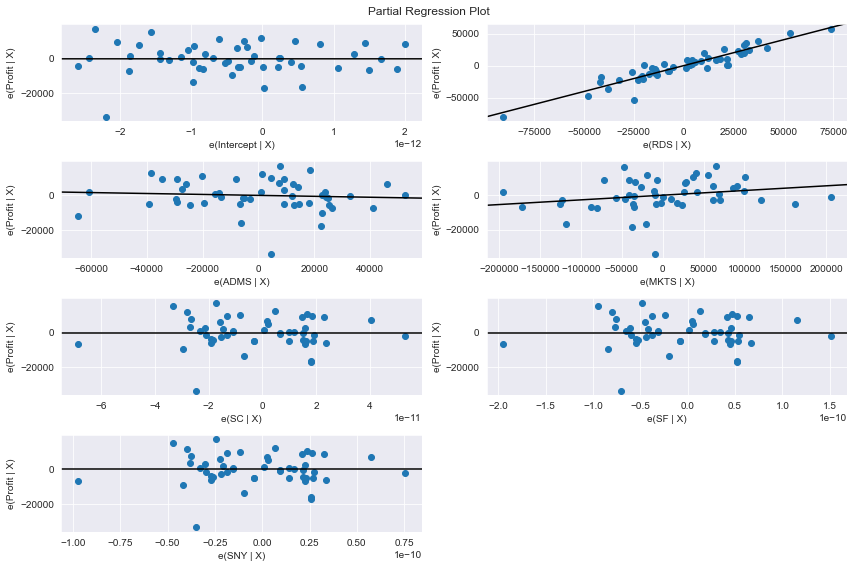

In [12]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value


In [14]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
       5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

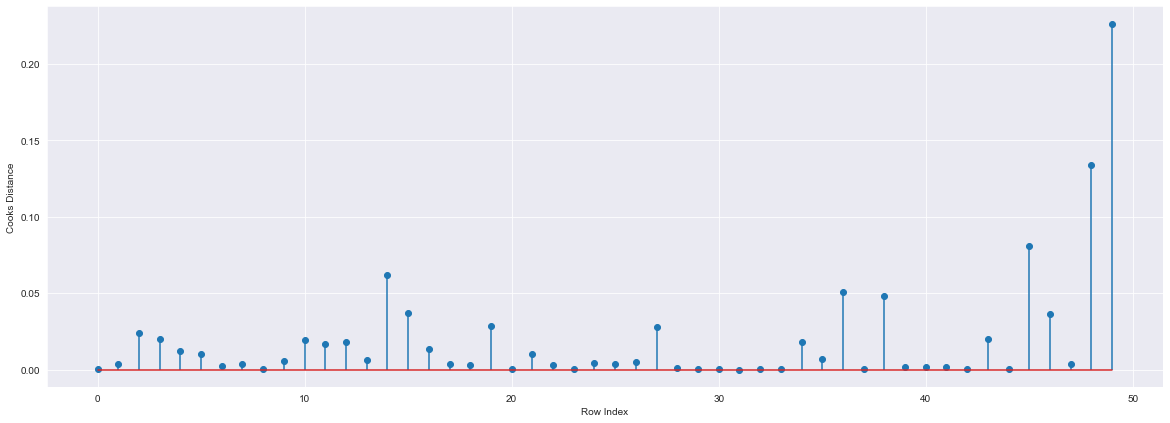

In [15]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [16]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.22625094501509238)

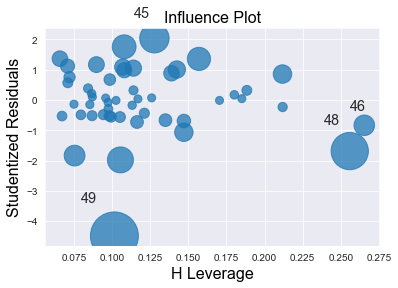

In [17]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [18]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [19]:
data1[data1.index.isin([49])] 

,RDS,ADMS,MKTS,Profit,SC,SF,SNY
49,0.0,116983.8,45173.06,14681.4,1,0,0



# Improving the Model

In [20]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,Profit,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


Model Deletion Diagnostics and Final Model

In [21]:
odel2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()

In [22]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918795
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [23]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     646.2
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.45e-22
Time:                        22:22:42   Log-Likelihood:                -253.87
No. Observations:                  27   AIC:                             515.7
Df Residuals:                      23   BIC:                             520.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.739e+04   3403.787     13.922      0.000    4.03e+04    5.44e+04
RDS            0.6937      0.030     23.347      0.000       0.632       0.755
ADMS           0.0256      0.024      1.064      0.298      -0.024       0.075
MKTS           0.0472      0.011      4.335      0.000       0.025       0.070
==============================================================================
Omnibus:                        3.469   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.329
Skew:                           0.713   Prob(JB):                        0.312
Kurtosis:                       3.190   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
data2

,RDS,ADMS,MKTS,Profit,SC,SF,SNY
0,142107.34,91391.77,366168.42,166187.94,0,1,0
1,131876.90,99814.71,362861.36,156991.12,0,0,1
2,130298.13,145530.06,323876.68,155752.60,0,1,0
3,120542.52,148718.95,311613.29,152211.77,0,0,1
4,123334.88,108679.17,304981.62,149759.96,1,0,0
5,91992.39,135495.07,252664.93,134307.35,1,0,0
6,94657.16,145077.58,282574.31,125370.37,0,0,1
7,91749.16,114175.79,294919.57,124266.90,0,1,0
8,76253.86,113867.30,298664.47,118474.03,1,0,0
9,67532.53,105751.03,304768.73,108733.99,0,1,0


Model Predictions

In [25]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [26]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [27]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

table containing R^2 value for each prepared model

In [28]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,Final_Model,0.988276
